In [1]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
[+] 0.1s
pkgs/main/linux-64 ━━━━━━━━━━━━╸━━━━━━━━━━━━   0.0 B /  ??.?MB @ 

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning

SyntaxError: unexpected EOF while parsing (2003727829.py, line 3)

In [5]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [6]:
import requests
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
if response.status_code == 200:
    html_data = response.text
    print("Webpage downloaded successfully.")
else:
    print(f"Failed to download webpage. Status Code: {response.status_code}")

Webpage downloaded successfully.


In [7]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')
print("Webpage Title:", soup.title.text)

Webpage Title: Tesla Revenue 2010-2022 | TSLA | MacroTrends


In [9]:
import pandas as pd
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

tesla_revenue=pd.DataFrame(columns=["Date","revenue"])
tables = pd.read_html(html_data)
tesla_revenue = tables[1]
print(tesla_revenue)

   Tesla Quarterly Revenue(Millions of US $)  \
0                                 2022-09-30   
1                                 2022-06-30   
2                                 2022-03-31   
3                                 2021-12-31   
4                                 2021-09-30   
5                                 2021-06-30   
6                                 2021-03-31   
7                                 2020-12-31   
8                                 2020-09-30   
9                                 2020-06-30   
10                                2020-03-31   
11                                2019-12-31   
12                                2019-09-30   
13                                2019-06-30   
14                                2019-03-31   
15                                2018-12-31   
16                                2018-09-30   
17                                2018-06-30   
18                                2018-03-31   
19                                2017-1

In [10]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

KeyError: 'Revenue'

In [11]:
tesla_revenue["Tesla Quarterly Revenue(Millions of US $)"] = tesla_revenue['Tesla Quarterly Revenue(Millions of US $)'].str.replace('[\$,]', '', regex=True)

In [12]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Tesla Quarterly Revenue(Millions of US $)'] != ""]

In [13]:
print(tesla_revenue.tail())

   Tesla Quarterly Revenue(Millions of US $)  \
48                                2010-09-30   
49                                2010-06-30   
50                                2010-03-31   
52                                2009-09-30   
53                                2009-06-30   

   Tesla Quarterly Revenue(Millions of US $).1  
48                                         $31  
49                                         $28  
50                                         $21  
52                                         $46  
53                                         $27  


In [14]:
import yfinance as yf
gme_ticker = yf.Ticker("GME")
print(gme_ticker)

yfinance.Ticker object <GME>


In [15]:

gme_data = gme_ticker.history(period="max")
print(gme_data)

                 Open       High        Low      Close    Volume  Dividends  \
Date                                                                          
2002-02-13   1.620128   1.693350   1.603296   1.691666  76216000        0.0   
2002-02-14   1.712707   1.716074   1.670626   1.683251  11021600        0.0   
2002-02-15   1.683251   1.687459   1.658002   1.674834   8389600        0.0   
2002-02-19   1.666418   1.666418   1.578047   1.607504   7410400        0.0   
2002-02-20   1.615920   1.662210   1.603296   1.662210   6892800        0.0   
...               ...        ...        ...        ...       ...        ...   
2024-04-22  10.410000  10.450000  10.010000  10.010000   3261000        0.0   
2024-04-23  10.050000  10.280000  10.010000  10.160000   2511800        0.0   
2024-04-24  10.160000  10.940000  10.160000  10.930000   4829600        0.0   
2024-04-25  10.700000  11.210000  10.480000  11.210000   4903800        0.0   
2024-04-26  11.180000  12.190000  11.000000  11.9000

In [16]:

gme_data.reset_index(inplace=True)
print(gme_data.head())

        Date      Open      High       Low     Close    Volume  Dividends  \
0 2002-02-13  1.620128  1.693350  1.603296  1.691666  76216000        0.0   
1 2002-02-14  1.712707  1.716074  1.670626  1.683251  11021600        0.0   
2 2002-02-15  1.683251  1.687459  1.658002  1.674834   8389600        0.0   
3 2002-02-19  1.666418  1.666418  1.578047  1.607504   7410400        0.0   
4 2002-02-20  1.615920  1.662210  1.603296  1.662210   6892800        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


In [17]:
import requests

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)
if response.status_code == 200:
    html_data1 = response.text
    print("Webpage downloaded successfully.")
else:
    print(f"Failed to download webpage. Status Code: {response.status_code}")

Webpage downloaded successfully.


In [18]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_data1, 'html.parser')
print("Webpage Title:", soup.title.text)

Webpage Title: GameStop Revenue 2006-2020 | GME | MacroTrends


In [19]:
import pandas as pd
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_data, 'html.parser')

tables = pd.read_html(html_data1)

print(f"Number of tables found: {len(tables)}")

for i, table in enumerate(tables):
    print(f"\nTable {i + 1}:\n{table}")
gme_revenue = tables[1]
print(gme_revenue)

Number of tables found: 6

Table 1:
    GameStop Annual Revenue(Millions of US $)  \
0                                        2020   
1                                        2019   
2                                        2018   
3                                        2017   
4                                        2016   
5                                        2015   
6                                        2014   
7                                        2013   
8                                        2012   
9                                        2011   
10                                       2010   
11                                       2009   
12                                       2008   
13                                       2007   
14                                       2006   
15                                       2005   

   GameStop Annual Revenue(Millions of US $).1  
0                                       $6,466  
1                               

In [20]:
import pandas as pd
from bs4 import BeautifulSoup

# Assuming html_data contains the HTML content
# If you used the previous code, html_data is the response.text

# Parse the HTML data with BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Find the second tbody tag as it contains the table with GameStop Revenue
table_body = soup.find_all("tbody")[1]

# Extract rows and columns from the table
rows = table_body.find_all("tr")

# Initialize empty lists for data
dates = []
revenues = []

# Extract data from 'td' elements within each 'tr' element
for row in rows[1:]:  # Skip the header row
    columns = row.find_all("td")
    date = columns[0].text.strip()
    revenue = columns[1].text.strip().replace(',', '').replace('$', '')  # Remove commas and dollar signs
    dates.append(date)
    revenues.append(revenue)

# Create a DataFrame from the extracted data
gme_revenue = pd.DataFrame({'Date': dates, 'Revenue': revenues})

# Display the resulting DataFrame
print(gme_revenue)

          Date Revenue
0   2022-06-30   16934
1   2022-03-31   18756
2   2021-12-31   17719
3   2021-09-30   13757
4   2021-06-30   11958
5   2021-03-31   10389
6   2020-12-31   10744
7   2020-09-30    8771
8   2020-06-30    6036
9   2020-03-31    5985
10  2019-12-31    7384
11  2019-09-30    6303
12  2019-06-30    6350
13  2019-03-31    4541
14  2018-12-31    7226
15  2018-09-30    6824
16  2018-06-30    4002
17  2018-03-31    3409
18  2017-12-31    3288
19  2017-09-30    2985
20  2017-06-30    2790
21  2017-03-31    2696
22  2016-12-31    2285
23  2016-09-30    2298
24  2016-06-30    1270
25  2016-03-31    1147
26  2015-12-31    1214
27  2015-09-30     937
28  2015-06-30     955
29  2015-03-31     940
30  2014-12-31     957
31  2014-09-30     852
32  2014-06-30     769
33  2014-03-31     621
34  2013-12-31     615
35  2013-09-30     431
36  2013-06-30     405
37  2013-03-31     562
38  2012-12-31     306
39  2012-09-30      50
40  2012-06-30      27
41  2012-03-31      30
42  2011-12

In [21]:
print(gme_revenue.tail())

          Date Revenue
48  2010-06-30      28
49  2010-03-31      21
50  2009-12-31        
51  2009-09-30      46
52  2009-06-30      27


[*********************100%***********************]  1 of 1 completed


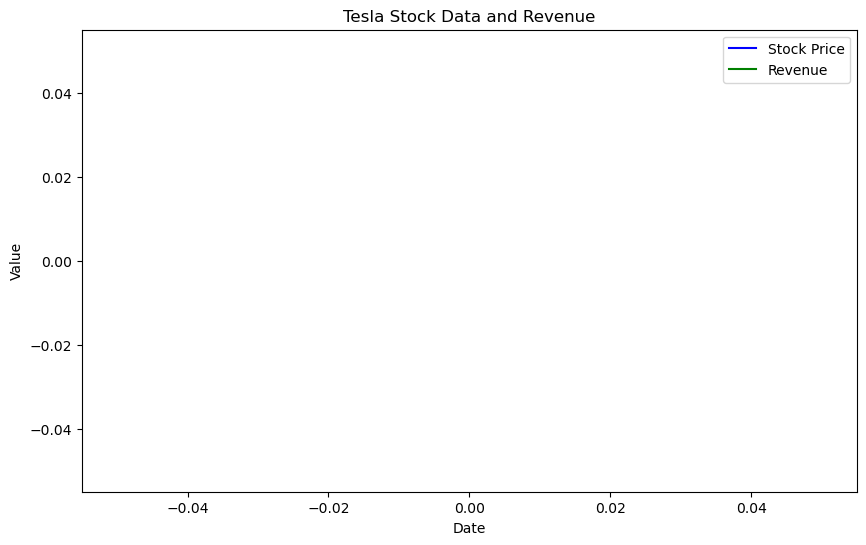

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

tesla_symbol = "TSLA"
tesla_data = yf.download(tesla_symbol, start="2021-01-01", end="2021-06-30")
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

def make_graph(stock_data, revenue_data, company_name):
    merged_data = pd.merge(stock_data, revenue_data, on='Date', how='inner')
    
    plt.figure(figsize=(10, 6))
    plt.plot(merged_data['Date'], merged_data['Close'], label='Stock Price', color='blue')
    plt.plot(merged_data['Date'], merged_data['Revenue'], label='Revenue', color='green')
    
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'{company_name} Stock Data and Revenue')
    plt.legend()
    plt.show()
make_graph(tesla_data, tesla_revenue, 'Tesla')


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

gme_symbol = "GME"
gme_data = yf.download(gme_symbol, start="2021-01-01", end="2021-06-30")
gme_revenue =  pd.DataFrame(columns=["Date", "Revenue"])
gme_data['Date'] = pd.to_datetime(gme_data['Date'])
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

def make_graph(stock_data, revenue_data, company_name):
    merged_data = pd.merge(stock_data, revenue_data, on='Date', how='inner')
    
    plt.figure(figsize=(10, 6))
    plt.plot(merged_data['Date'], merged_data['Close'], label='Stock Price', color='blue')
    plt.plot(merged_data['Date'], merged_data['Revenue'], label='Revenue', color='green')
    
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'{company_name} Stock Data and Revenue')
    plt.legend()
    plt.show()
make_graph(gme_data, gme_revenue, 'GameStop')


[*********************100%***********************]  1 of 1 completed


KeyError: 'Date'